<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(4)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_4_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,80.900799,63.531528,76.015542,81.868639,1876.276446,2188.592954,326.329205,1862.263749
1,0.0,1.0,29.623826,23.916917,59.677098,23.201365,-824.767114,-678.347908,-796.363804,118.015895
2,0.0,2.0,50.542149,79.821941,26.065621,34.642569,-1850.922218,-1649.849938,758.864852,-2408.714790
3,0.0,3.0,20.910835,42.658528,31.152941,64.170047,-1175.701271,-1006.808920,-445.427973,-561.380947
4,0.0,4.0,84.388185,70.198099,80.427833,39.883235,16342.621906,16627.519259,600.631520,16026.887739
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,41.585030,63.205683,23.292445,27.132150,2723.439914,2888.655223,-752.889512,3641.544735
119996,999.0,116.0,31.984616,48.869989,30.413158,56.469656,4440.359316,4618.096734,402.087659,4216.009075
119997,999.0,117.0,98.186250,89.691688,73.225335,91.783085,-6316.641967,-5953.755609,257.919860,-6211.675469
119998,999.0,118.0,29.100911,33.899521,97.307941,48.839066,2183.256321,2402.403760,673.922018,1728.481741


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4             e  \
rep   index                                                             
0.0   0.0    80.900799  63.531528  76.015542  81.868639   1876.276446   
      1.0    29.623826  23.916917  59.677098  23.201365   -824.767114   
      2.0    50.542149  79.821941  26.065621  34.642569  -1850.922218   
      3.0    20.910835  42.658528  31.152941  64.170047  -1175.701271   
      4.0    84.388185  70.198099  80.427833  39.883235  16342.621906   
...                ...        ...        ...        ...           ...   
999.0 115.0  41.585030  63.205683  23.292445  27.132150   2723.439914   
      116.0  31.984616  48.869989  30.413158  56.469656   4440.359316   
      117.0  98.186250  89.691688  73.225335  91.783085  -6316.641967   
      118.0  29.100911  33.899521  97.307941  48.839066   2183.256321   
      119.0  35.041935  89.289863  52.628792  25.847331  -5710.209630   

                        Y       y_hat         e_hat  
rep   index                                          
0.0   0.0     2188.592954  326.329205   1862.263749  
      1.0     -678.347908 -796.363804    118.015895  
      2.0    -1649.849938  758.864852  -2408.714790  
      3.0    -1006.808920 -445.427973   -561.380947  
      4.0    16627.519259  600.631520  16026.887739  
...                   ...         ...           ...  
999.0 115.0   2888.655223 -752.889512   3641.544735  
      116.0   4618.096734  402.087659   4216.009075  
      117.0  -5953.755609  257.919860  -6211.675469  
      118.0   2402.403760  673.922018   1728.481741  
      119.0  -5497.401709 -883.479121  -4613.922588  

[120000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4             e  \
rep   index                                                             
0.0   0.0    80.900799  63.531528  76.015542  81.868639   1876.276446   
      1.0    29.623826  23.916917  59.677098  23.201365   -824.767114   
      2.0    50.542149  79.821941  26.065621  34.642569  -1850.922218   
      3.0    20.910835  42.658528  31.152941  64.170047  -1175.701271   
      4.0    84.388185  70.198099  80.427833  39.883235  16342.621906   
...                ...        ...        ...        ...           ...   
999.0 115.0  41.585030  63.205683  23.292445  27.132150   2723.439914   
      116.0  31.984616  48.869989  30.413158  56.469656   4440.359316   
      117.0  98.186250  89.691688  73.225335  91.783085  -6316.641967   
      118.0  29.100911  33.899521  97.307941  48.839066   2183.256321   
      119.0  35.041935  89.289863  52.628792  25.847331  -5710.209630   

                        Y       y_hat         e_hat  
rep   index                                          
0.0   0.0     2188.592954  326.329205   1862.263749  
      1.0     -678.347908 -796.363804    118.015895  
      2.0    -1649.849938  758.864852  -2408.714790  
      3.0    -1006.808920 -445.427973   -561.380947  
      4.0    16627.519259  600.631520  16026.887739  
...                   ...         ...           ...  
999.0 115.0   2888.655223 -752.889512   3641.544735  
      116.0   4618.096734  402.087659   4216.009075  
      117.0  -5953.755609  257.919860  -6211.675469  
      118.0   2402.403760  673.922018   1728.481741  
      119.0  -5497.401709 -883.479121  -4613.922588  

[120000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,80.900799,63.531528,76.015542,81.868639,1876.276446,2188.592954,326.329205,1862.263749
1,0.0,1.0,29.623826,23.916917,59.677098,23.201365,-824.767114,-678.347908,-796.363804,118.015895
2,0.0,2.0,50.542149,79.821941,26.065621,34.642569,-1850.922218,-1649.849938,758.864852,-2408.714790
3,0.0,3.0,20.910835,42.658528,31.152941,64.170047,-1175.701271,-1006.808920,-445.427973,-561.380947
4,0.0,4.0,84.388185,70.198099,80.427833,39.883235,16342.621906,16627.519259,600.631520,16026.887739
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,41.585030,63.205683,23.292445,27.132150,2723.439914,2888.655223,-752.889512,3641.544735
119996,999.0,116.0,31.984616,48.869989,30.413158,56.469656,4440.359316,4618.096734,402.087659,4216.009075
119997,999.0,117.0,98.186250,89.691688,73.225335,91.783085,-6316.641967,-5953.755609,257.919860,-6211.675469
119998,999.0,118.0,29.100911,33.899521,97.307941,48.839066,2183.256321,2402.403760,673.922018,1728.481741


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4             e  \
rep   index                                                             
0.0   0.0    80.900799  63.531528  76.015542  81.868639   1876.276446   
      1.0    29.623826  23.916917  59.677098  23.201365   -824.767114   
      2.0    50.542149  79.821941  26.065621  34.642569  -1850.922218   
      3.0    20.910835  42.658528  31.152941  64.170047  -1175.701271   
      4.0    84.388185  70.198099  80.427833  39.883235  16342.621906   
...                ...        ...        ...        ...           ...   
999.0 115.0  41.585030  63.205683  23.292445  27.132150   2723.439914   
      116.0  31.984616  48.869989  30.413158  56.469656   4440.359316   
      117.0  98.186250  89.691688  73.225335  91.783085  -6316.641967   
      118.0  29.100911  33.899521  97.307941  48.839066   2183.256321   
      119.0  35.041935  89.289863  52.628792  25.847331  -5710.209630   

                        Y       y_hat         e_hat  
rep   index                                          
0.0   0.0     2188.592954  326.329205   1862.263749  
      1.0     -678.347908 -796.363804    118.015895  
      2.0    -1649.849938  758.864852  -2408.714790  
      3.0    -1006.808920 -445.427973   -561.380947  
      4.0    16627.519259  600.631520  16026.887739  
...                   ...         ...           ...  
999.0 115.0   2888.655223 -752.889512   3641.544735  
      116.0   4618.096734  402.087659   4216.009075  
      117.0  -5953.755609  257.919860  -6211.675469  
      118.0   2402.403760  673.922018   1728.481741  
      119.0  -5497.401709 -883.479121  -4613.922588  

[120000 rows x 8 columns]

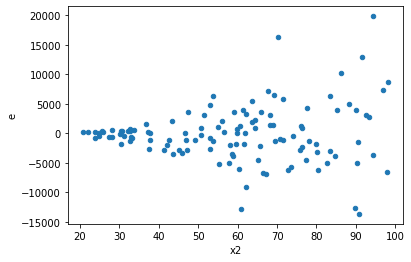

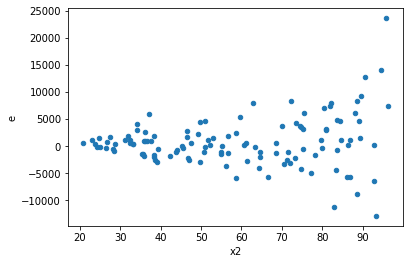

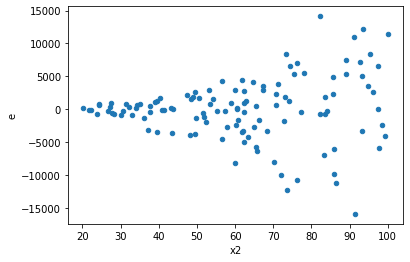

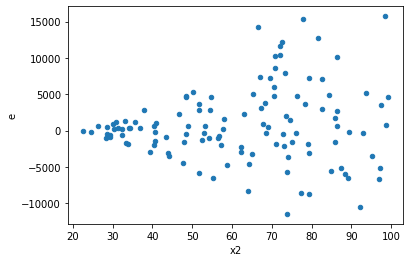

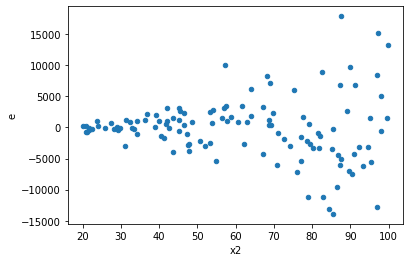

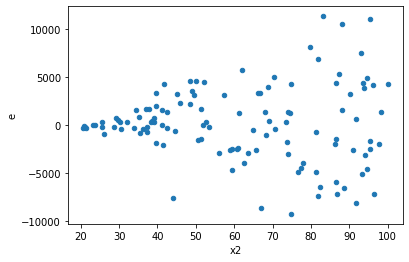

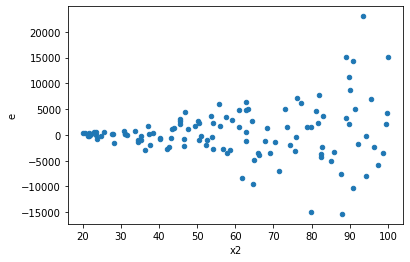

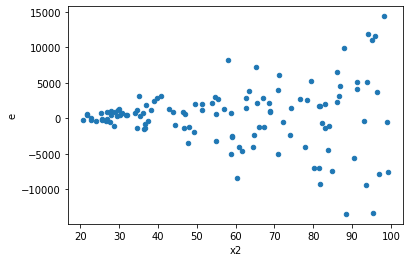

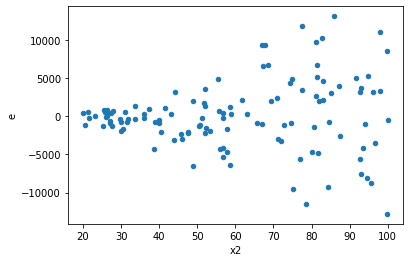

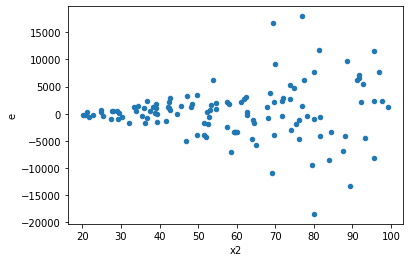

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,64.0,48.0,442057293.4617388,1795695140.4439034,6907145.210339669,37410315.42591465,5.416176189536769,1.1820442624710381e-08,0.9999999940897787,5.9102213123551905e-09,Reject001=0 : Heteroscedasticity
2.0,65.0,47.0,830405085.6910529,1694909162.3970964,12775462.85678543,36061897.07227865,2.8227468136800304,0.000287134442814585,0.9998564327785927,0.0001435672214072925,Reject001=0 : Heteroscedasticity
3.0,52.0,60.0,1288718457.4088535,1542140909.647694,24783047.257862568,25702348.494128235,1.0370939548595668,0.8872561453580423,0.5563719273209788,0.44362807267902116,Reject001=1 : Homoscedasticity
9.0,49.0,63.0,811763690.079979,1880255091.5770752,16566605.91999957,29845318.91392183,1.801534910532996,0.0279628278931483,0.9860185860534258,0.01398141394657415,Reject001=1 : Homoscedasticity
12.0,49.0,63.0,1044001118.2559634,2185072530.446811,21306145.270529866,34683690.95947319,1.6278726404558415,0.0685257696929209,0.9657371151535395,0.03426288484646045,Reject001=1 : Homoscedasticity
14.0,65.0,47.0,1136454291.002555,1590862089.4780266,17483912.169270076,33848129.56336227,1.935958567834385,0.01865481373757616,0.9906725931312119,0.00932740686878808,Reject001=1 : Homoscedasticity
15.0,61.0,51.0,1077267560.9014673,1455334448.2653062,17660123.94920438,28535969.573829535,1.6158419757362534,0.07984589157997224,0.9600770542100139,0.03992294578998612,Reject001=1 : Homoscedasticity
16.0,44.0,68.0,850427363.4312739,1975309149.877658,19327894.623438045,29048663.968789086,1.5029398977353234,0.1288639396139073,0.9355680301930464,0.06443196980695365,Reject001=1 : Homoscedasticity
17.0,65.0,47.0,377514643.43980753,1842006080.1631756,5807917.591381654,39191618.72687607,6.747963983688812,2.991713543565311e-10,0.9999999998504143,1.4958567717826554e-10,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,55.0,57.0,2197476610.729306,426558119.59104925,39954120.1950783,7483475.78229911,0.1873017287268649,3.7106449175221303e-09,Reject001=0 : Heteroscedasticity
1.0,64.0,48.0,442057293.4617388,1795695140.4439034,6907145.210339669,37410315.42591465,5.416176189536769,1.1820442624710381e-08,Reject001=0 : Heteroscedasticity
2.0,65.0,47.0,830405085.6910529,1694909162.3970964,12775462.85678543,36061897.07227865,2.8227468136800304,0.000287134442814585,Reject001=0 : Heteroscedasticity
3.0,52.0,60.0,1288718457.4088535,1542140909.647694,24783047.257862568,25702348.494128235,1.0370939548595668,0.8872561453580423,Reject001=1 : Homoscedasticity
4.0,65.0,47.0,2094283031.6869233,737526001.5526114,32219738.949029587,15692042.586225774,0.4870319592300234,0.00731009915906816,Reject001=0 : Heteroscedasticity
5.0,43.0,69.0,1040314246.0440316,627309964.6903906,24193354.559163526,9091448.76362885,0.3757828928351465,0.0008372993541916907,Reject001=0 : Heteroscedasticity
6.0,66.0,46.0,2318244922.3504434,507271664.20204794,35124923.06591581,11027644.873957563,0.31395499011522293,1.7695187530906744e-05,Reject001=0 : Heteroscedasticity
7.0,68.0,44.0,1419837123.3208504,768209291.9488595,20879957.69589486,17459302.089746807,0.8361751658711178,0.5001361334074761,Reject001=1 : Homoscedasticity
8.0,51.0,61.0,1489722089.2918596,820143395.5012717,29210237.044938423,13444973.69674216,0.46028293697369765,0.005034425376342259,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    565
Reject001=1 : Homoscedasticity      435
Name: Result_test, dtype: int64